# Tensor(张量）类似于NumPy的ndarray，但还可以在GPU上使用来加速计算

In [42]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3561, 0.4547, 0.9893],
        [0.2263, 0.5530, 0.8162],
        [0.3074, 0.9132, 0.6850],
        [0.6611, 0.9236, 0.0086],
        [0.6057, 0.8060, 0.8920]])


In [43]:
x = torch.empty(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [44]:
x = torch.zeros(5,3,dtype = torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [45]:
x = torch.tensor([5.5,3])
print(x)



tensor([5.5000, 3.0000])


In [46]:
x = x.new_ones(5,4 ,dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [47]:
x = torch.randn_like(x,dtype = torch.float)
print(x)

tensor([[ 0.5208,  0.4216,  2.6519,  0.0886],
        [-1.5675,  0.1781,  1.1898, -1.3630],
        [ 1.5391,  0.3137,  0.4801,  0.3056],
        [ 0.3869,  1.5468, -1.7732, -1.3372],
        [-1.9680, -0.9303, -0.5355,  1.2360]])


In [48]:
print(x.size())

torch.Size([5, 4])


In [49]:
y = torch.rand(5,4)
print(x+y)

tensor([[ 0.7360,  0.7400,  3.5157,  0.7489],
        [-1.5222,  0.3108,  1.9376, -0.9627],
        [ 2.1064,  0.7318,  1.0878,  1.1047],
        [ 0.7136,  1.8619, -1.5439, -1.0168],
        [-1.2543, -0.2594, -0.1402,  1.4068]])


In [50]:
print(torch.add(x,y))

tensor([[ 0.7360,  0.7400,  3.5157,  0.7489],
        [-1.5222,  0.3108,  1.9376, -0.9627],
        [ 2.1064,  0.7318,  1.0878,  1.1047],
        [ 0.7136,  1.8619, -1.5439, -1.0168],
        [-1.2543, -0.2594, -0.1402,  1.4068]])


In [51]:
result = torch.empty(5,4)
torch.add(x,y, out = result)
print(result)

tensor([[ 0.7360,  0.7400,  3.5157,  0.7489],
        [-1.5222,  0.3108,  1.9376, -0.9627],
        [ 2.1064,  0.7318,  1.0878,  1.1047],
        [ 0.7136,  1.8619, -1.5439, -1.0168],
        [-1.2543, -0.2594, -0.1402,  1.4068]])


In [52]:
y.add_(x)
print(y)

tensor([[ 0.7360,  0.7400,  3.5157,  0.7489],
        [-1.5222,  0.3108,  1.9376, -0.9627],
        [ 2.1064,  0.7318,  1.0878,  1.1047],
        [ 0.7136,  1.8619, -1.5439, -1.0168],
        [-1.2543, -0.2594, -0.1402,  1.4068]])


In [53]:
print(x)
print(x[:,1])

tensor([[ 0.5208,  0.4216,  2.6519,  0.0886],
        [-1.5675,  0.1781,  1.1898, -1.3630],
        [ 1.5391,  0.3137,  0.4801,  0.3056],
        [ 0.3869,  1.5468, -1.7732, -1.3372],
        [-1.9680, -0.9303, -0.5355,  1.2360]])
tensor([ 0.4216,  0.1781,  0.3137,  1.5468, -0.9303])


In [54]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [55]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.2736])
0.2735942602157593


In [56]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)


tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [57]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [58]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out = a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [59]:
x = torch.ones(2,2,requires_grad = True)
print(x)
y = x + 2
print(y)
print(y.grad_fn)
z = y*y*3
out = z.mean()
print(z,out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [60]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [61]:
print(x)
print(out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor(27., grad_fn=<MeanBackward0>)


In [62]:

print(x.grad)

None


In [68]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 1.2603, -1.5023,  1.5783], requires_grad=True)
tensor([ 645.2864, -769.1926,  808.0933], grad_fn=<MulBackward0>)


In [69]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(y)
print(x.grad)

tensor([ 645.2864, -769.1926,  808.0933], grad_fn=<MulBackward0>)
tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [74]:
import torch
x=torch.randn((3),dtype=torch.float32,requires_grad=True)
y = torch.randn((3),dtype=torch.float32,requires_grad=True)
z = torch.randn((3),dtype=torch.float32,requires_grad=True)
t = x + y
loss = t.dot(z)  

loss.backward(retain_graph=True)
print(z,x.grad,y.grad) 
print(t,z.grad)   
print(t.grad)

tensor([0.7879, 0.0545, 1.0177], requires_grad=True) tensor([0.7879, 0.0545, 1.0177]) tensor([0.7879, 0.0545, 1.0177])
tensor([ 1.6641, -1.4221,  0.6103], grad_fn=<AddBackward0>) tensor([ 1.6641, -1.4221,  0.6103])
None


<ipython-input-74-92ba83fd66aa>:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(t.grad)


In [75]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [76]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [79]:
import torch
from torch.autograd import Variable
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor, requires_grad= True)
print(variable)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


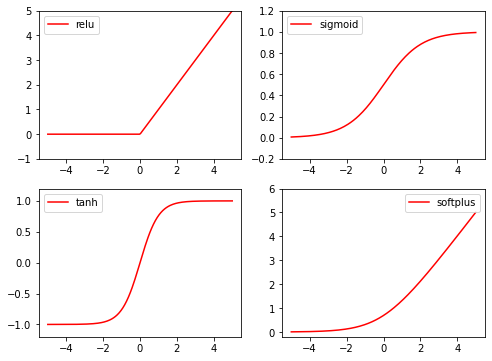

In [82]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(200, 1)
x = Variable(x)
x_np = x.data.numpy() 

y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()


plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

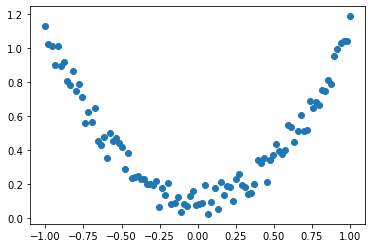

In [83]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [88]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() #官方写法
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
#print(net)  # net architecture

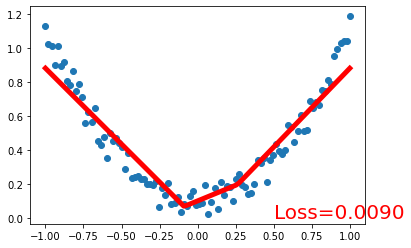

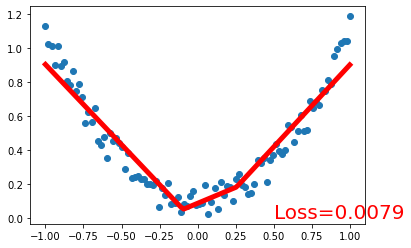

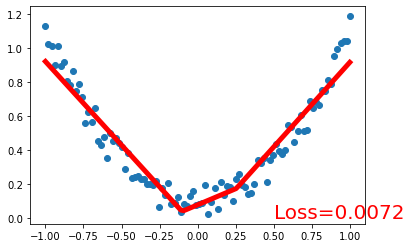

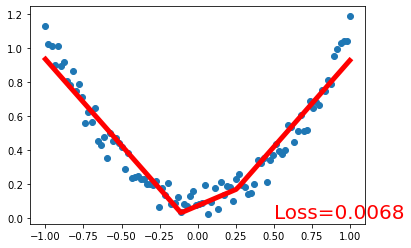

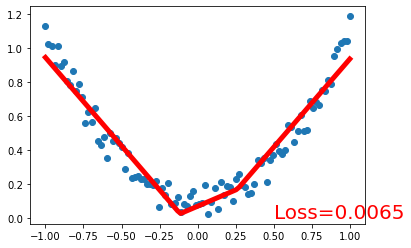

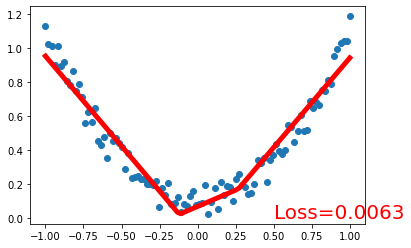

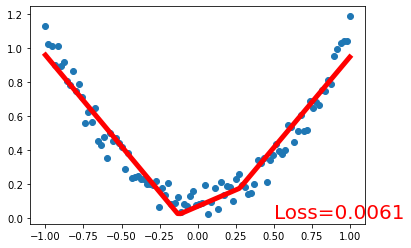

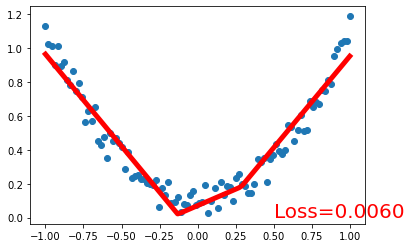

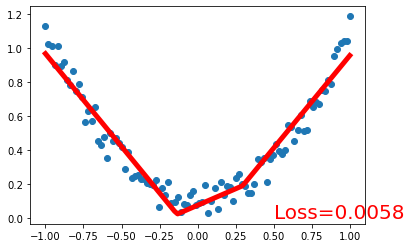

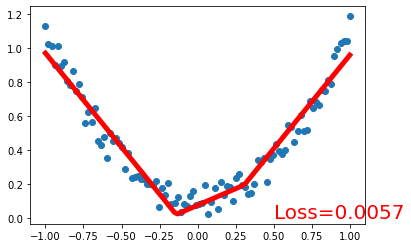

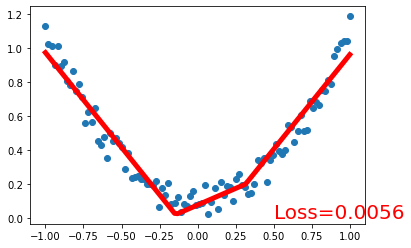

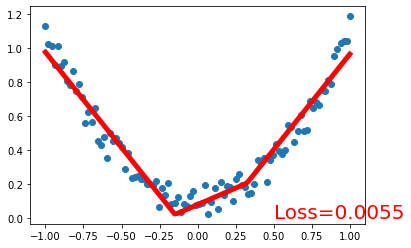

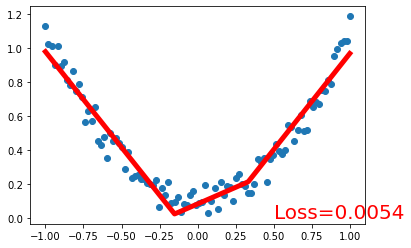

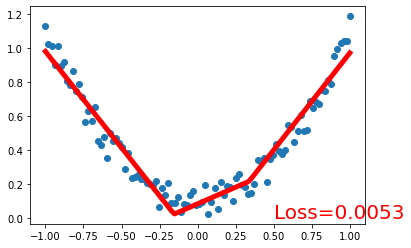

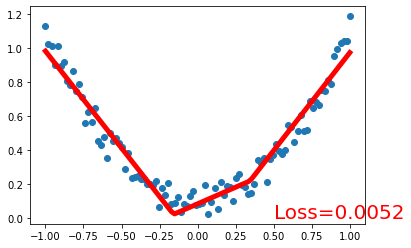

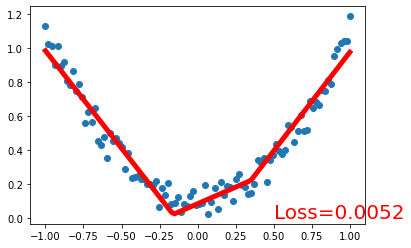

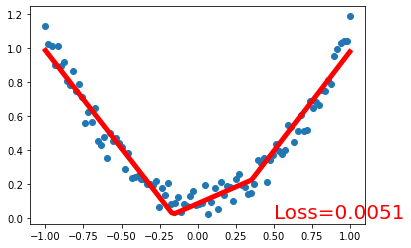

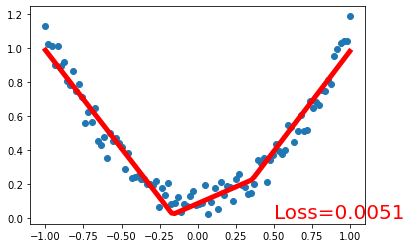

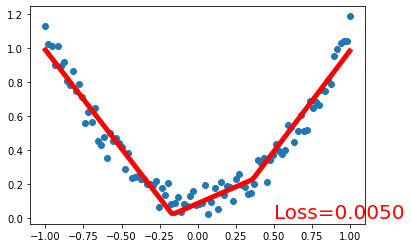

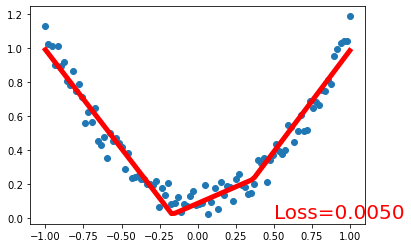

In [87]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()
for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

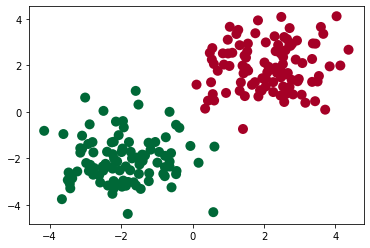

In [97]:

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1) # class0 x data (tensor), shape=(100, 2) normal 正态分布（均值，方差）

y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating cat((A,B),0 横着拼，1竖着拼)
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer LongTensor 就是这么写的

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [99]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss() 

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [100]:
plt.ion()

<ipython-input-101-07d3f8ace48d>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


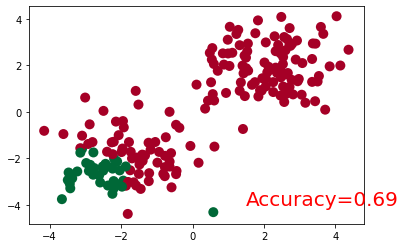

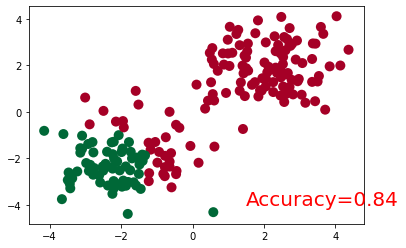

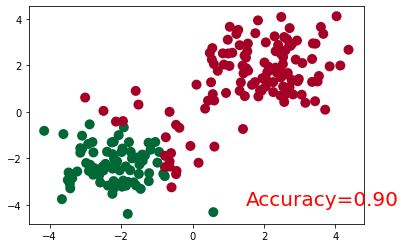

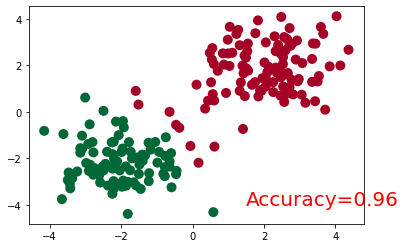

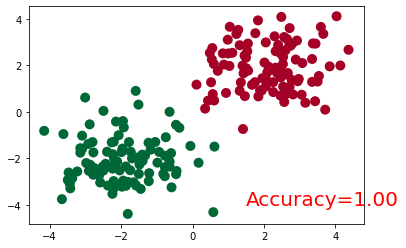

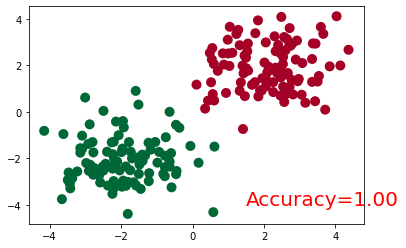

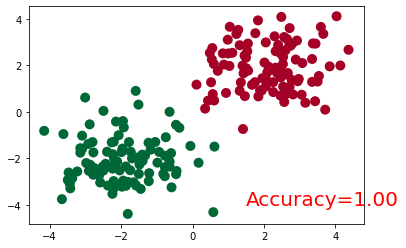

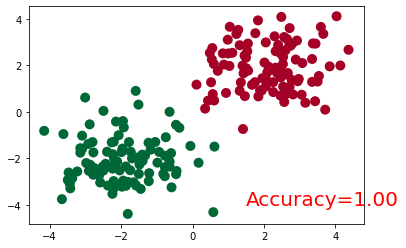

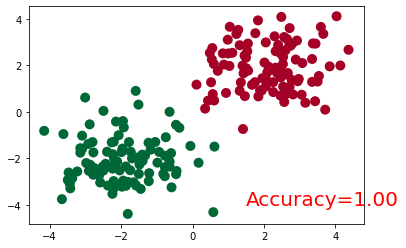

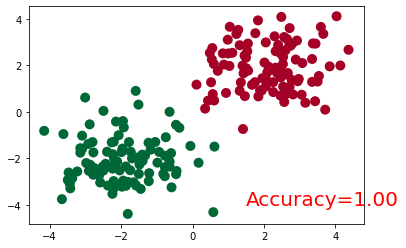

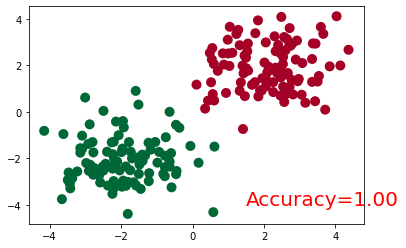

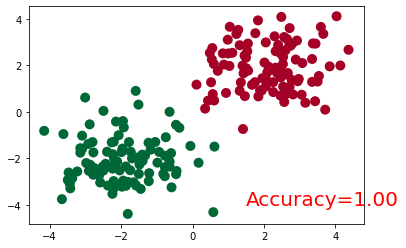

In [101]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()